# Final Project Submission

Please fill out:
* Student name: Jamald O. Aquino
* Student pace: self paced
* Scheduled project review date/time: August 26 9am
* Instructor name: Joe Comeaux
* Blog post URL:https://medium.com/@jamaldaquino


# Next Box Office Hit Analysis

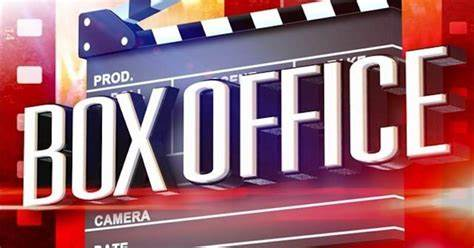

## Overview

This project analyzes the top fifty most lucrative films in the past five years. In order for Microsoft to enter the film industry successfully, analysis of several film databases were done in search for current and ongoing trends of the most successful films. Analysis shows that popular genres like 'Horror', 'Thriller', and 'Drama' do most successful at the box office, with a recommended release date in the month of July or October. Production budgets  range between 3.5 million US dollars and 12 million dollars.

## Business Problem

Microsoft is looking to create its own original video content, and have decided to enter the film industry. Microsoft does not know anything about creating movies. Knowing the genre, how much of a budget to allocate, and what time of the year to release a film could help Microsoft be equally successful as the current film industry giants.

## Data

The data used was taken from two different websites: The Numbers and TheMovieDB. Both databases are stored in 'csv' format. The Numbers database contains the production budgets, domestic gross, and worldwide gross of several films, while TheMovieDB database contains the films' genres, and both contain the release dates of the films.

### Investigating and Cleaning the Data

In [1]:
#import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [2]:
#Connect to necessary databases
movie_budgets_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
movie_info_df = pd.read_csv('zippedData/tmdb.movies.csv.gz')

#### 1. Data Acquired from The Numbers

This database is useful for calculating the return of investment on the films by using the columns __['production_budget],  ['domestic_gross'], ['worldwide_gross']__. 
                                                                                                       
Aside from calculating the return of investment, using the column __['release_date']__ would be useful in investigating the
trends of an ideal time of the year to release a movie. 

In [3]:
movie_budgets_df.info()
movie_budgets_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


Because __['production_budget],  ['domestic_gross'], ['worldwide_gross']__ columns are object data, these will need to be converted to 'int64' in order to successfully use these columns to compute the return of investment and future calculations requiring the data be set to 'int64.'
The __['release_date']__ column is also an object data, which will need to be converted later to 'datetime64[ns].'

In [4]:
#Change the data type of production_budget, domestic_gross, worldwide_gross
def change_to_int64(object_data):
    object_data1 = object_data.str.replace("$","")
    object_data2 = object_data1.str.replace(",","")
    object_data3 = object_data2.astype('int64')
    return object_data3

In [5]:
#Making these changes in place
movie_budgets_df['production_budget'] = change_to_int64(movie_budgets_df['production_budget'])
movie_budgets_df['domestic_gross'] = change_to_int64(movie_budgets_df['domestic_gross'])
movie_budgets_df['worldwide_gross'] = change_to_int64(movie_budgets_df['worldwide_gross'])

When checking for duplicates, we must double check for revivals, where movies will have the same name but different release dates.Therefore, it is necessary to use a subset of __['movie','release_date']__ when checking for duplicates.

In [6]:
#Check for duplicates with subset=['movie','release_date']
movie_budgets_df.duplicated(subset=['movie','release_date']).value_counts()

False    5782
dtype: int64

In [7]:
#Check for null values
movie_budgets_df.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

#### 2. Data Acquired from TheMovieDB

In [8]:
movie_info_df.info()
movie_info_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


It is most beneficial to use TheMovieDB database by using the column __['genre_ids']__. By using __['genre_ids']__, we are able to see which genre is the most successful at the box office. But before this data can be utilized, we must acquire additional data on what each genre ID means. We will do this by using an API call to the TheMovieDB website. We then, can check the response of the call and if the response is 200, we are granted access to the genre ID data.

In [9]:
#Establish a get request from TheMovieDB
url = 'https://api.themoviedb.org/3/genre/movie/list?api_key=49499f6b5be5140bcd4250219a7f5f1e&language=en-US'
API_response = requests.get(url)

In [10]:
#Check API response
API_response.status_code

200

In [11]:
#Retrieve genre information
API_response.content

b'{"genres":[{"id":28,"name":"Action"},{"id":12,"name":"Adventure"},{"id":16,"name":"Animation"},{"id":35,"name":"Comedy"},{"id":80,"name":"Crime"},{"id":99,"name":"Documentary"},{"id":18,"name":"Drama"},{"id":10751,"name":"Family"},{"id":14,"name":"Fantasy"},{"id":36,"name":"History"},{"id":27,"name":"Horror"},{"id":10402,"name":"Music"},{"id":9648,"name":"Mystery"},{"id":10749,"name":"Romance"},{"id":878,"name":"Science Fiction"},{"id":10770,"name":"TV Movie"},{"id":53,"name":"Thriller"},{"id":10752,"name":"War"},{"id":37,"name":"Western"}]}'

In [12]:
#Change genre ID to appropriate genre category
genre_labels = {
    "28": "Action",
    "12": "Adventure",
    "16": "Animation",
    "35": "Comedy",
    "80": "Crime",
    "99": "Documentary",
    "18": "Drama",
    "10751": "Family",
    "14": "Fantasy",
    "36": "History",
    "27": "Horror",
    "10402": "Music",
    "9648": "Mystery",
    "10749": "Romance",
    "878": "Science Fiction",
    "10770": "TV Movie",
    "53": "Thriller",
    "10752": "War",
    "37": "Western"
}

In [13]:
#Replacing the genre ID's with respective label
movie_info_df['genre_ids'] = movie_info_df['genre_ids'].replace(genre_labels, regex=True)
movie_info_df['genre_ids'].head()

0               [Adventure, Fantasy, Family]
1    [Fantasy, Adventure, Animation, Family]
2       [Adventure, Action, Science Fiction]
3                [Animation, Comedy, Family]
4       [Action, Science Fiction, Adventure]
Name: genre_ids, dtype: object

Renaming the column __['genre_ids']__ to __['genre_labels']__ for better readability, and removing columns that will not be pertinent to our business problem.

In [14]:
#Rename column ['genre_ids']
movie_info_df.rename(columns={'genre_ids' : 'genre_labels'}, inplace=True)

In [15]:
#Delete unnecessary columns
movie_info_df = movie_info_df.drop(['Unnamed: 0', 'original_language','id', 'original_title', 'vote_average','vote_count', 'popularity'], axis=1)

In [16]:
#Again, checking for duplicates making sure we do not rule out revivals, or movies with the same name.
movie_info_df.duplicated(subset=['title','release_date']).value_counts()

False    25490
True      1027
dtype: int64

In [17]:
#Removing duplicate rows
movie_info_df.drop_duplicates(subset=['title','release_date'], keep='first', inplace=True)

#### Merge the TheMovieDB and The Numbers Databases


We will be merging the two bases on two columns: __['movie']__ and __['release_date']__. Again, we want both of these conditions to match because of the possible rule out of revivals and movies with the same name but different genres. We must first make sure that both columns are the same data type and have the same respective column names. 

In [18]:
#Rename column ['title'] from TheMovieDB to ['movie'] to match The Numbers dataframe
movie_info_df.rename(columns={'title' : 'movie'}, inplace=True)

In [19]:
#Changing the type of data of both columns ['release_date'] 
movie_budgets_df['release_date']= pd.to_datetime(movie_budgets_df['release_date'])
movie_info_df['release_date']= pd.to_datetime(movie_info_df['release_date'])

In [20]:
#Merging both dataframes
merged_movie_df = movie_budgets_df.merge(movie_info_df, on=['movie', 'release_date'], how = 'left')

From here, we will form a __['return_of_investment']__ column which we will use to find out the highest return of investment by percentage. We do this by dividing the _net profit_(subtracting production budget from total gross) by the _production budget_, and multiplying this value by 100.

In [21]:
#Creating variables for better readability
total_gross = merged_movie_df['domestic_gross']+merged_movie_df['worldwide_gross']
net_profit = total_gross - merged_movie_df['production_budget']
production_budget = merged_movie_df['production_budget']

In [22]:
merged_movie_df['net_profit'] = net_profit

In [23]:
#Create column for return of investment
merged_movie_df['return_of_investment']= (net_profit/production_budget)*100

In [24]:
merged_movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 0 to 5781
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    5782 non-null   int64         
 1   release_date          5782 non-null   datetime64[ns]
 2   movie                 5782 non-null   object        
 3   production_budget     5782 non-null   int64         
 4   domestic_gross        5782 non-null   int64         
 5   worldwide_gross       5782 non-null   int64         
 6   genre_labels          1270 non-null   object        
 7   net_profit            5782 non-null   int64         
 8   return_of_investment  5782 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 451.7+ KB


Dropping null values from the column __['genre_labels']__ would not be conducive to the overall data because the other values in the rows are important metrics as well. What we will be doing is ignoring these values when using data from the column __['genre_labels']__ when finding trends.

The current, general population are watching completely different movies compared to what the general population was watching twenty, even ten years ago. To keep the data more current, we will be analyzing data from the last five years, specifically from May 31, 2014 to May 31, 2019. We do this by setting conditions on the __['release_date']__ column and making a completely different dataframe.

In [25]:
merged_movie_df1 = merged_movie_df[merged_movie_df.release_date > '2014-05-31']

Because we are looking for top performing movies at the box office, we will be looking at the top 50 movies with highest return of investment percentage. We will make a separate dataframe that only has the the top fifty films with the highest return of investment.

In [26]:
merged_ROI_df = merged_movie_df1.sort_values(by='return_of_investment', ascending=False)[:50]

In [27]:
merged_netprofit_df = merged_movie_df1.sort_values(by='net_profit', ascending=False)[:50]

### Analyzing the Data

First, using both databases, we will analyze the column __['production_budget']__ from the merged_ROI_df to give us an idea of what to set the production budget. By finding the mean, 25, 50, 75  percentile, these values give us an idea of how much money to allocate for budget for a film to be successful.

In [28]:
print(merged_ROI_df['production_budget'].describe())

count    5.000000e+01
mean     1.183750e+07
std      1.584641e+07
min      2.500000e+04
25%      3.500000e+06
50%      5.000000e+06
75%      1.200000e+07
max      7.400000e+07
Name: production_budget, dtype: float64


According to the data, a successful box office hit would have a production budget anywhere between 3.5 million dollars and 12 million dollars with the mean production budget being around 12 million dollars and the median being 5 million dollars.

C:\Users\Jamald Aquino\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Production Budgets (US$)')

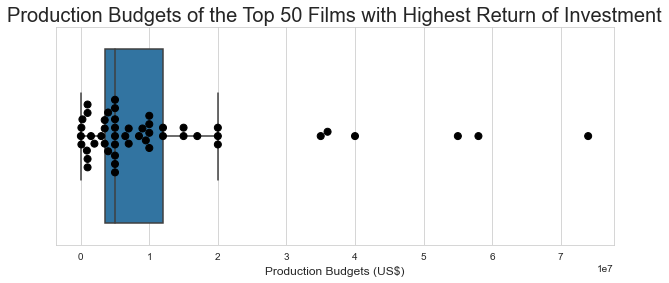

In [29]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,4))
sns.boxplot(merged_ROI_df['production_budget'],showfliers=False)
sns.swarmplot(x =merged_ROI_df['production_budget'],linewidth=1,color='black',size=7) 
plt.title('Production Budgets of the Top 50 Films with Highest Return of Investment', fontsize=20)
plt.xlabel('Production Budgets (US$)', fontsize=12)

Next, we will analyze which genre/s appears the most out of the top 50 films with highest return of investment. Some films are labelled in multiple categories, allowing some creative freedom in choosing genres. We will make a dictionary out of the genres against the count of them reappearing in merged_ROI_df['genre_labels'].

In [30]:
#Making lists to 
genre_labels_list =["Action", "Adventure", "Animation", "Comedy", "Crime", "Documentary", "Drama", "Family", "Fantasy",
    "History", "Horror","Music","Mystery","Romance","Science Fiction","TV Movie","Thriller","War","Western"]
genre_occurrence = [merged_ROI_df['genre_labels'].str.count("Action").sum(),
    merged_ROI_df['genre_labels'].str.count("Adventure").sum(), 
    merged_ROI_df['genre_labels'].str.count("Animation").sum(),merged_ROI_df['genre_labels'].str.count("Comedy").sum(),
    merged_ROI_df['genre_labels'].str.count("Crime").sum(),merged_ROI_df['genre_labels'].str.count("Documentary").sum(),
    merged_ROI_df['genre_labels'].str.count("Drama").sum(),merged_ROI_df['genre_labels'].str.count("Family").sum(),
    merged_ROI_df['genre_labels'].str.count("Fantasy").sum(),merged_ROI_df['genre_labels'].str.count("History").sum(),
    merged_ROI_df['genre_labels'].str.count("Horror").sum(), merged_ROI_df['genre_labels'].str.count("Music").sum(),
    merged_ROI_df['genre_labels'].str.count("Mystery").sum(), merged_ROI_df['genre_labels'].str.count("Romance").sum(),
    merged_ROI_df['genre_labels'].str.count("Science Fiction").sum(),
    merged_ROI_df['genre_labels'].str.count("TV Movie").sum(), merged_ROI_df['genre_labels'].str.count("Thriller").sum(),
    merged_ROI_df['genre_labels'].str.count("War").sum(), merged_ROI_df['genre_labels'].str.count("Western").sum()]

According to the data, the most lucrative genres that generate the highest return of investment are 'Horror', 'Thriller,' and 'Drama.'

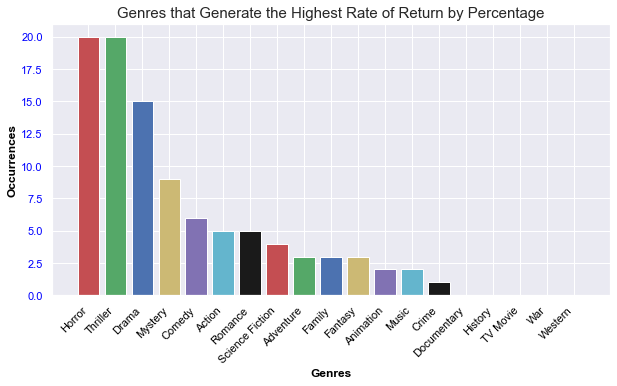

In [31]:
genre_occurrence_dict = dict(zip(genre_labels_list,genre_occurrence))
sorted_genre_occurrence_dict = dict(sorted(genre_occurrence_dict.items(), key=lambda item:item[1], 
reverse=True))
sns.set()
plt.figure(figsize=(10,5))
plt.bar(list(sorted_genre_occurrence_dict.keys()), sorted_genre_occurrence_dict.values(), 
         color = ['r','g','b','y','m','c','k'])

plt.title("Genres that Generate the Highest Rate of Return by Percentage", fontsize=15)
plt.xticks(color = 'black',rotation = 45, horizontalalignment = 'right')
plt.yticks(color = 'blue')
plt.xlabel('Genres', color = 'black', fontweight = 'bold', fontsize = '12')
plt.ylabel('Occurrences', color = 'black', fontweight = 'bold', fontsize = '12')
plt.show()

Next, we'll check for the best month to release a film. We will do this by counting the months that each top fifty film has been released.
According to the data, the months of July, October or March are the best months for successful films.

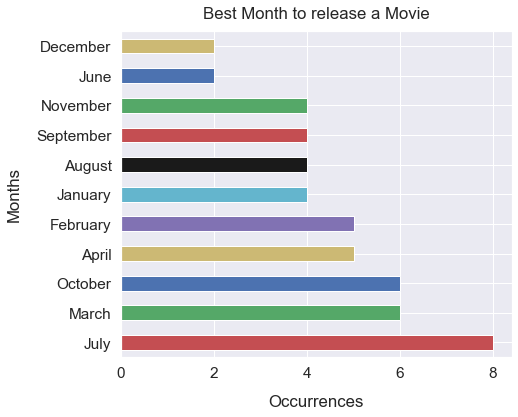

In [32]:
sns.set(font_scale=1.4)
merged_ROI_df['release_date'].dt.month_name().value_counts().plot(kind='barh', figsize=(7, 6), rot=0,color = ['r','g','b','y','m','c','k'])
plt.xlabel("Occurrences", labelpad=14)
plt.ylabel("Months", labelpad=14)
plt.title("Best Month to release a Movie", y=1.02);

## Conclusions

This analysis concludes to three recommended results for Microsoft to become successful in the film industry and create a hit at the box office:           
           -__Set a production budget of between 3.5 million dollars and 12 million dollars__, in favor of a higher budget on the range.              
  -__Select the genre of the movie to be among 'Horror,' 'Thriller,' or 'Drama.'__ Some films fit more than one genre, giving      more creative freedom.                  
          -__Release the film during the months of July, October, or March,__ with July being the most advantageous month of the three.

###### Next Steps:

-__Consider what movie rating(G, PG, PG-13, R, or NC-17) is best for the film.__ A lower movie rating could incentivize more people to see the film.               
-__Consider releasing films on streaming services.__ More and more major studios are releasing their films on their respective streaming services.